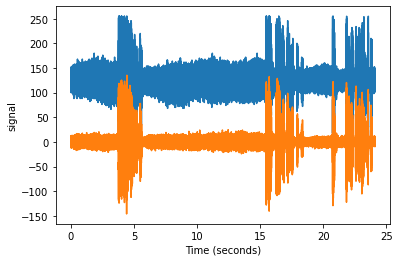

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import urllib

from IPython.display import Audio
%matplotlib inline
url = "https://www.nasa.gov/62284main_onesmall2.wav"
Audio(url)
# Fetch sound file
local_filename, headers = urllib.request.urlretrieve(url)

# Read frequency and data array for sound track
fs, x = scipy.io.wavfile.read(local_filename) 

# If we have a stero track (left and right channels), take just the first channel
if len(x.shape) > 1:
    x = x[:, 0]

# Check that it plays
Audio(x, rate=fs)

# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)

# Plot signal
plt.plot(t, x)
plt.xlabel('time (seconds)')
plt.ylabel('signal');

# Perform discrete Fourier transform (real signal)
xf = np.fft.rfft(x)

# Create frequency axis for plotting
freq = np.linspace(0.0, fs/2, len(xf))
"""
plt.semilogy(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');
"""
# Create copy og transformed signal
xf_filtered = xf.copy()

# Cut-off frequencies (Hz)
cutoff_freq_low = 400
cutoff_freq_high = 1800

# Cut-off indices in transform array
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)

# Remove low and high frequencies
xf_filtered[:n_cut_low] = 0.0
xf_filtered[n_cut_high:] = 0.0

# Plot filtered transform 
"""
plt.semilogy(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');
"""

# Perform inverse transform on filtered signal
x_filtered = np.fft.irfft(xf_filtered)

# Plot signal
plt.plot(t, x_filtered)
plt.xlabel('Time (seconds)')
plt.ylabel('signal');

Audio(x_filtered, rate=fs)